## <center>Comparison of Classification Techniques to Predict whether the Cancer is Benign or Malignant on Breast Cancer Wisconsin Dataset </center>
<center> <b>A Healthcare Problem Analysis with Real World Data</b> </center> 

### <center>Part 1 - Data exploration (EDA)</center>
#### <center>26th June 2022 </center>
<center><b>Mohammad Shahid</b></center>

### <b>Abstract</b>
#### <b>Introduction</b>
Cancer death is one of humanity's major problems in the developing world. Despite the fact that there are many ways to prevent it before happening, some cancer types still do not have a treatment. Breast cancer is one of the most common types of cancer, and early detection is crucial in its treatment. It develops from breast tissue when cells in the region grow out of control. One of the key steps in treating breast cancer is  accurate diagnosis.

#### <b>Method</b>
Our main objective is to identify which features are most helpful in predicting malignant or benign cancer from the available Wisconsin Breast Cancer (WBC) Data set and compare different classification algorithms to get better performance measures.

<b>Keywords</b> – Wisconsin Breast cancer data set, data exploration, feature selection, machine learning.

# So, let's get started 🧑👈🙏💪

<b>This is going to be a 3-part series. Part 1 covers data exploratory data analysis (EDA), Part 2 covers feature selection, modeling and evaluation and whilst Part 3 will dive into the moedel deployment.</b>

<b>Here, we will learn step-by-step guide to complete the real Data Science project with best performing model that will generalize across unseen data. </b>

 *  [<b>Part 1 - Exploratory data analysis</b>](#eda)  
  <a class="anchor" id="bcImp"></a> 
     * [<b>Import libraries & datasets</b>](#importDataset)
     * [<b>Data overview</b>](#dOverview)
          * [About dataset](#aboutDataset)
          * [Health check up of the dataset](#charDataset)
          * [<b>In summary</b>](#summaryData)
     * [<b>Statistical overview</b>](#sOverview)
          * [Describe the dataset](#desDataset)
          * [Analysis of outcome feature (<b>'diagnosis'</b>)](#distOutcome)
          * [<b>In summary</b>](#5noSummaryData)
          * [<b>Distributions</b>](#distributions)
               * [Check distribution of all continuous independent features](#distIndependent)
               * [Exploring data using violinplot](#violinplot)
               * [Exploring data using swarmplot](#swarmplot)
               * [<b>In summary</b>](#summaryDistribution)
          * [<b>Relationship</b>](#relationship)
               * [Exploring data using joint plot](#jointPlot)
               * [Explore pairplots between dependent and independent features](#pairplots)
               * [Check heatmap of continuous features](#heatmap)
               * [<b>In summary</b>](#relationshipSummary)
 * [<b>Part 2 - Feature Selection, Modeling and Evaluation</b>](#evaluation)
      * [Feature selection using voted method](#fs)
      * [Model building](#mBuilding)
      * [Model evaluation](#mEvaluation)
 * [<b>Part 3 - Model Deployment Using Flask APIs and Heroku</b>](#deployment)
      * [Final model deployment](#fModelDeployment)

## 1.1 Import libraries & datasets <a class="anchor" id="importDataset"></a> 
[Back to Table of Contents](#bcImp)

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
data = pd.read_csv("../data/data.csv")

## 1.2 Data overview <a class="anchor" id="dOverview"></a>
[Back to Table of Contents](#bcImp)
### 1.2.1 About dataset <a class="anchor" id="aboutDataset"></a>

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:
#### 1. ID number
#### 2. Diagnosis (M = malignant, B = benign) 
#### 3-32 
#### Ten real-valued features are computed for each cell nucleus:
#### a. radius (mean of distances from center to points on the perimeter)
#### b. texture (standard deviation of gray-scale values)
#### c. perimeter 
#### d) area 
#### e) smoothness (local variation in radius lengths)
#### f. compactness (perimeter^2 / area - 1.0)
#### g. concavity (severity of concave portions of the contour)
#### h. concave points (number of concave portions of the contour)
#### i. symmetry 
#### j) fractal dimension ("coastline approximation" - 1)
The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.
Missing attribute values: none
Class distribution: 357 benign, 212 malignant
### 1.2.2 Health check-up of the dataset <a class="anchor" id="charDataset"></a>
[Back to Table of Contents](#bcImp)

“<b>Data quality</b> is one of the most important problems in data management, since dirty data often leads to inaccurate data analytics results and incorrect business decisions by <b>Ihab F. Ilyas (Author), Xu Chu (Author).”</b>

#### Check diamension diamension of the dataset, missing values and data type.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.shape

(569, 33)

#### Check if the <b>column</b> is unique

In [3]:
print('unique column values')
data.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(10)

unique column values


id                      569
smoothness_se           547
fractal_dimension_se    545
area_worst              544
concave points_mean     542
compactness_se          541
radius_se               540
area_mean               539
concavity_worst         539
compactness_mean        537
dtype: int64

We found only <b>ID column</b> is unique.

#### Missing value analysis

Text(0, 0.5, 'Features')

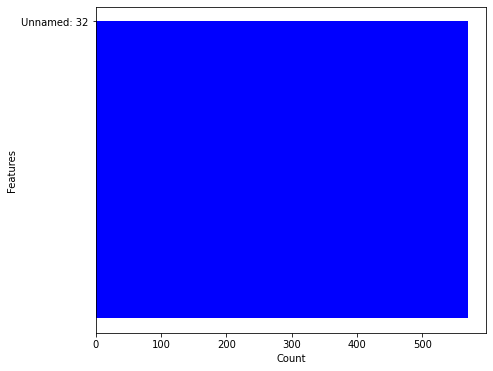

In [4]:
#cols_with_missing = [col for col in train.columns if train[col].isnull().any()]
cols_with_missing = data.isnull().sum()
cols_with_missing = cols_with_missing[cols_with_missing>0]
cols_with_missing.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(7,6))  
width = 0.70 # the width of the bars 
ind = np.arange(len(cols_with_missing))  # the x locations for the groups
ax.barh(ind, cols_with_missing, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(cols_with_missing.index, minor=False)
plt.xlabel('Count')
plt.ylabel('Features') 

<b>Unnamed 32</b> has the missing values.

#### Drop unnecessary <b>column</b> from dataset

In [5]:
# Get column names
col = data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


We can exclude unnecessary columns from the dataset and separate dependent (y) and and independent(X) data:
* <b>There is an id that cannot be used for classification.</b>
*  <b>Diagnosis is our class label.</b>
*  <b>Unnamed: 32 feature includes NaN so we do not need it.</b>

In [6]:
# y includes our outcome label and X includes our features
y = data.diagnosis # M or B 
list_drp = ['Unnamed: 32','id','diagnosis']
X = data.drop(list_drp,axis = 1 )

<b>Check duplicate records</b>

In [7]:
# calculate duplicates
dups = X.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(X[dups])

False
Empty DataFrame
Columns: [radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 30 columns]


##  In summary <a class="anchor" id = "summaryData"></a>
[Back to Table of Contents](#bcImp)

We can conclude that:
<ul>
    <li>There are <b>569</b> instances of <b>data</b>.</li>
    <li>Total number of <b>features</b> equals <b>33</b>, of which <b>31 is numerical, </b> plus <b>Id</b> and <b>diagnosis.</b></li>
    <li>One <b>feature (Unnamed: 32)</b> has missing values in the dataset</li>
    <li> There is one unique column which is <b>'Id'</b></li>
    <li> No <b>duplicate</b> records</li>
 </ul>

##  1.3 Statistical overview <a class="anchor" id = "sOverview"></a>
[Back to Table of Contents](#bcImp)

### 1.3.1 Description of the dataset<a class="anchor" id="desDataset"></a>
[Back to Table of Contents](#bcImp)

Statistical information can be viewed in the below table. For numerical parameters, fields like mean, standard deviation, percentiles, and maximum have been populated. This gives us a broad idea of our dataset.

In [8]:
X.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

### 1.3.2 Analysis of the outcome variable (diagnosis)<a class="anchor" id="distOutcome"></a>
[Back to Table of Contents](#bcImp)

Number of Benign:  357
Number of Malignant :  212


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


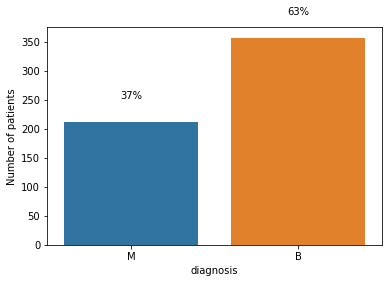

In [9]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)
ax.set_ylabel('Number of patients')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

##  In summary <a class="anchor" id = "5noSummaryData"></a>
[Back to Table of Contents](#bcImp)

We can conclude that:
* Important summary statistics of all the numerical variables like the mean, std, min, 25%, 50%, 75%, and max values.
* There is <b>high variation</b> in values in <b>area_mean</b> and <b>area_worst.
* There are many variables have median value 0.
* The <b>area_worst</b> feature’s max value is <b>4254</b> and <b>fractal_dimension_se</b> features’ max <b>0.029840</b>. This indicates we need to standardize or normalize data before visualization, feature selection, and classification.
* <b>Bar plot</b> of <b>diagnosis</b> shows that <b>Malignant</b> and <b>Benign</b> patients ratio is <b>37% (212/569)</b> and <b>63% (357/569)</b> respectively. 

## 1.3.3 Distributions<a class="anchor" id="distributions"></a>

### 1.3.3.1 Distribution of all numerical independent features<a class="anchor" id="distIndependent"></a>
[Back to Table of Contents](#bcImp)

We applied <b>Shapiro–Wilk test</b> to all the numerical features to check whether they follow a normal distribution or not.

In [10]:
# Check normal distribution of all numerical features
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(X)
normal = normal.apply(test_normality)
print(not normal.any())

False


And the result is <b>False</b> means none of the numerical features follow the normal distribution.

#### 1.3.3.2 Exploring data using violinplot<a class="anchor" id="violinplot"></a>
[Back to Table of Contents](#bcImp)

A violinplot is a graphical representation of data where values are depicted by color. A violin plot pursues the same activity that a whisker or box plot does.

Before plotting our data we need to normalization or standardization. Because differences between values of features are very high to observe on plot. We plot features in two groups and each group includes 15 features to observe better.

<b>Violin plot for first 15 features (1-15).</b>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se'),
  Text(13, 0, 'area_se'),
  Text(14, 0, 'smoothness_se')])

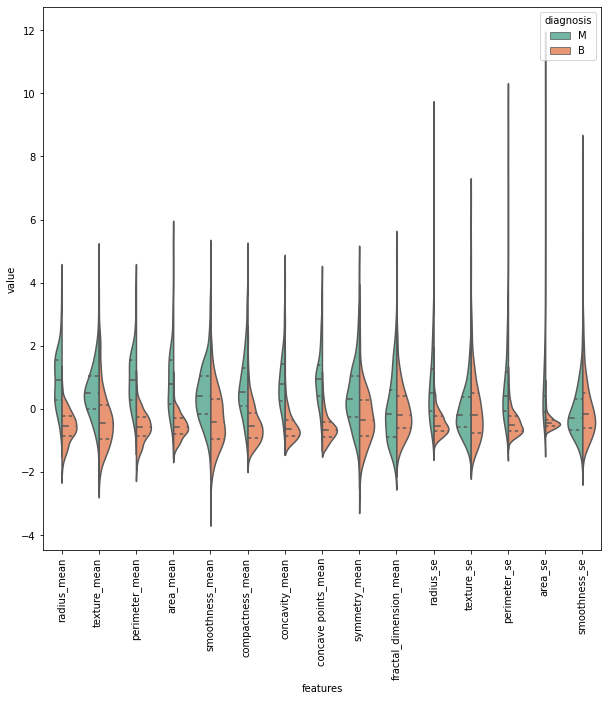

In [11]:
# First 15 features
data_dia = y
data = X
# standardization of the data
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y,data_n_2.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart",palette ="Set2")
plt.xticks(rotation=90)

Lets interpret the plot above together. Green represents Malignant cases and orange Benign. For example, in <b>radius_mean,texture_mean,perimeter_mean, area_mean, compactness_mean, concavity_mean and concave_points_mean</b> features, median of the Malignant and Benign looks like separated so it can be good for classification. However, in <b>fractal_dimension_mean, texture_se, and smoothness_se features</b>, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

<b>Violin plot for next 15 features (15-30).</b>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'compactness_se'),
  Text(1, 0, 'concavity_se'),
  Text(2, 0, 'concave points_se'),
  Text(3, 0, 'symmetry_se'),
  Text(4, 0, 'fractal_dimension_se'),
  Text(5, 0, 'radius_worst'),
  Text(6, 0, 'texture_worst'),
  Text(7, 0, 'perimeter_worst'),
  Text(8, 0, 'area_worst'),
  Text(9, 0, 'smoothness_worst'),
  Text(10, 0, 'compactness_worst'),
  Text(11, 0, 'concavity_worst'),
  Text(12, 0, 'concave points_worst'),
  Text(13, 0, 'symmetry_worst'),
  Text(14, 0, 'fractal_dimension_worst')])

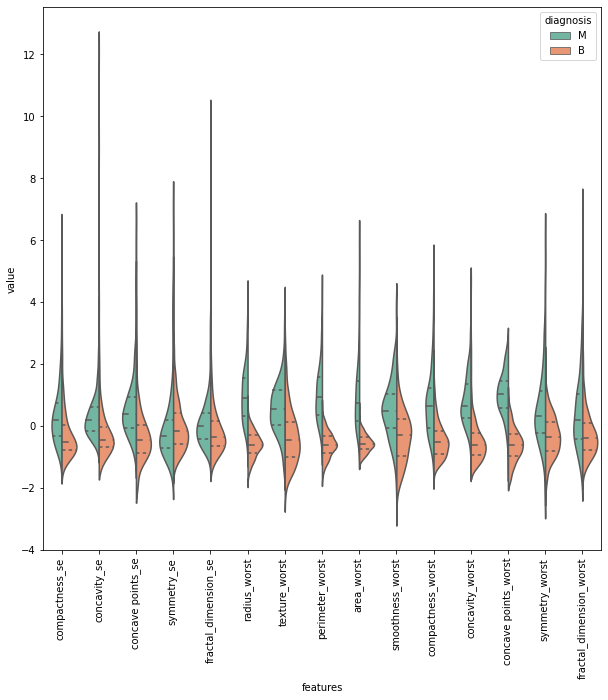

In [12]:
# Next 15 features
data = pd.concat([y,data_n_2.iloc[:,15:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart",palette ="Set2")
plt.xticks(rotation=90)

Lets interpret one more thing about plots above, variable of <b>texture_se, smoothness_se, concavity_worst, and concave point_worst looks like similar</b> but how can we decide whether they are correlated with each other or not. (Not always true but, basically if the features are correlated with each other we can drop one of them)


#### 1.3.3.3 Exploring data using swarmplot<a class="anchor" id="swarmplot"></a>
[Back to Table of Contents](#bcImp)

A swarm plot is very similar to a strip plot. It is basically a scatter plot where the x axis represents a categorical variable. Typical uses of a strip plot involves applying a small random jitter value to each data point such that the separation between points becomes clearer:

Before plotting our data we need to normalization or standardization. Because differences between values of features are very high to observe on plot. I plot features in two groups and each group includes 15 features to observe better.

<b>Swarm plot for first 15 features (1-15).</b>

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 69.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 70.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 70.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 73.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 69.6% of the points cannot be placed; y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se'),
  Text(13, 0, 'area_se'),
  Text(14, 0, 'smoothness_se')])

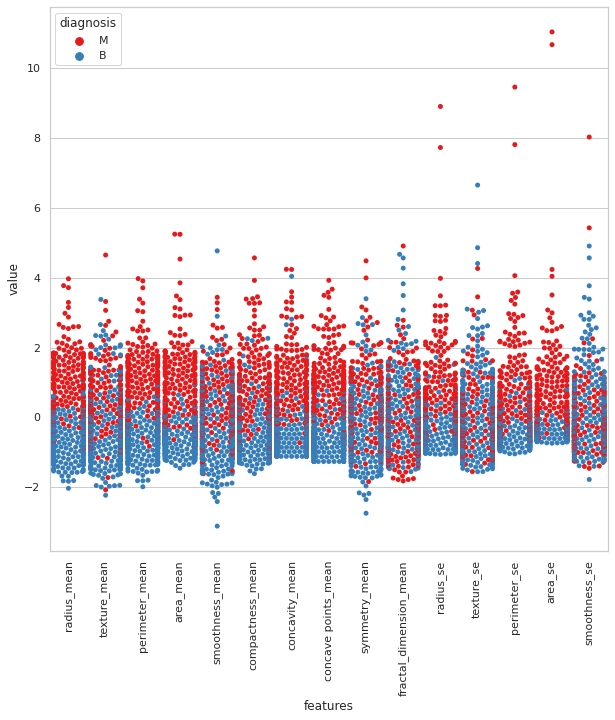

In [13]:
# First 15 features
sns.set(style="whitegrid", palette="Set1")
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
#tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

Each dot represents a cancer patients. Red indicates Malignant and blue Benign pateints. They looks cool right and we can see variance more clear. Let me ask you a question, in these two plots which feature looks like more clear in terms of classification. In my opinion <b>radius_mean, area_se</b> in the above swarm plot looks like malignant and benign are separated not totally but mostly. However, <b>smoothness_mean,symmetry_mean, fractal_dimension_mean, and texture_mean</b> in the above swarm plot looks like malignant and benign are mixed so it is hard to classify while using these feature.

<b>Swarm plot for next 15 features (15-30).</b>

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 78.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 72.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 78.2% of the points cannot be placed; y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'compactness_se'),
  Text(1, 0, 'concavity_se'),
  Text(2, 0, 'concave points_se'),
  Text(3, 0, 'symmetry_se'),
  Text(4, 0, 'fractal_dimension_se'),
  Text(5, 0, 'radius_worst'),
  Text(6, 0, 'texture_worst'),
  Text(7, 0, 'perimeter_worst'),
  Text(8, 0, 'area_worst'),
  Text(9, 0, 'smoothness_worst'),
  Text(10, 0, 'compactness_worst'),
  Text(11, 0, 'concavity_worst'),
  Text(12, 0, 'concave points_worst'),
  Text(13, 0, 'symmetry_worst'),
  Text(14, 0, 'fractal_dimension_worst')])

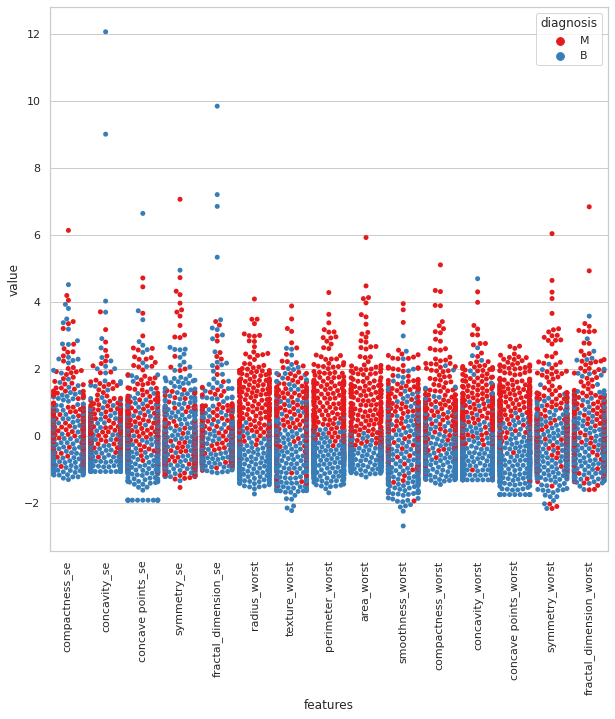

In [14]:
# Next 15 features
data = pd.concat([y,data_n_2.iloc[:,15:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

Smilarly, in my opinion <b>radius_worst, area_worst</b> in the above swarm plot looks like malignant and benign are separated not totally but mostly. However, <b>compactness_se,symmetry_se, and smoothness_worst</b> in the above swarm plot looks like malignant and benign are mixed so it is hard to classify while using these feature.

##  In summary <a class="anchor" id = "summaryDistribution"></a>
[Back to Table of Contents](#bcImp)

We can conclude that:
* <b>None</b> of the continuous feature follows normal distribution. 
* vialinplot and swarmplot can be used to see the distribution of cases.
* We can interprete from violin plot, features <b>radius_mean,texture_mean,perimeter_mean, area_mean, compactness_mean, concavity_mean, and concave_points_mean</b> may be good for cancer classification.
* Pair of variables of <b>(concavity_worst, and concave point_worst), (concavity_mean and concave point_mean), and (concavity_se and concave point_se)</b> looks like similar. Check correlation between them. 
* Swarm plot indicates variables <b>radius_mean, area_se, radius_worst, and area_worst</b> looks like malignant and benign are separated not totally but mostly.

## 1.3.4 Relationship<a class="anchor" id="relationship"></a>
[Back to Table of Contents](#bcImp)
#### 1.3.4.1 Exploring data using joint plot<a class="anchor" id="jointPlot"></a>
[Back to Table of Contents](#bcImp)

Check both the distribution and relationship between two variables. From above information from violin and swarm plot, lets check the correlation between similar variables. 

<b>Check correlation between concavity_worst and concave point_worst using joint plot.</b>


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.1, 0.9, '$\\rho = 0.855, p = 0.000$')

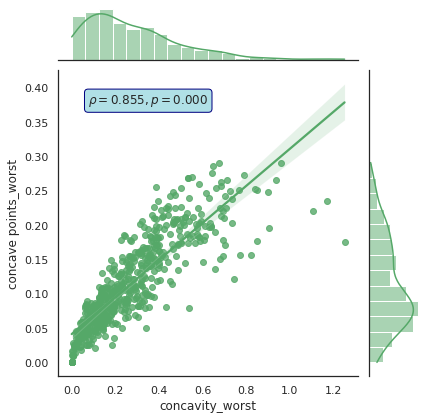

In [15]:
import scipy.stats as stats
sns.set(style="white",color_codes=True)
jp=sns.jointplot(X.loc[:,'concavity_worst'], X.loc[:,'concave points_worst'], kind="reg",color="g")

#jp.annotate(stats.pearsonr(X.loc[:,'concavity_worst'], X.loc[:,'concave points_worst']))
r, p = stats.pearsonr(X.loc[:,'concavity_worst'], X.loc[:,'concave points_worst'])
jp.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})

<b>Check correlation between concavity_mean and concave point_mean using joint plot.</b>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.1, 0.9, '$\\rho = 0.921, p = 0.000$')

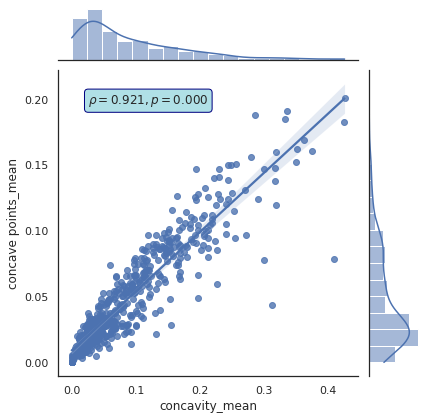

In [16]:
jp=sns.jointplot(X.loc[:,'concavity_mean'], X.loc[:,'concave points_mean'], kind="reg",color="b")
#jp.annotate(stats.pearsonr)
r, p = stats.pearsonr(X.loc[:,'concavity_mean'], X.loc[:,'concave points_mean'])
jp.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})

<b>Check correlation between concavity_se and concave point_se using joint plot.</b>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.1, 0.9, '$\\rho = 0.772, p = 0.000$')

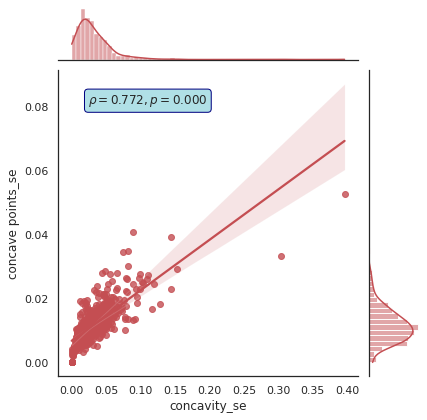

In [17]:
jp=sns.jointplot(X.loc[:,'concavity_se'], X.loc[:,'concave points_se'], kind="reg",color="r")
#jp.annotate(stats.pearsonr)
r, p = stats.pearsonr(X.loc[:,'concavity_se'], X.loc[:,'concave points_se'])
jp.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})

#### 1.3.4.2 Explore pairplots between dependent and independent features<a class="anchor" id="pairplots"></a>
[Back to Table of Contents](#bcImp)

Pair plots to check both the distribution of single variable and relationship between two variables.

<b>Pairplot for first six features (1-6).</b>

<Figure size 720x720 with 0 Axes>

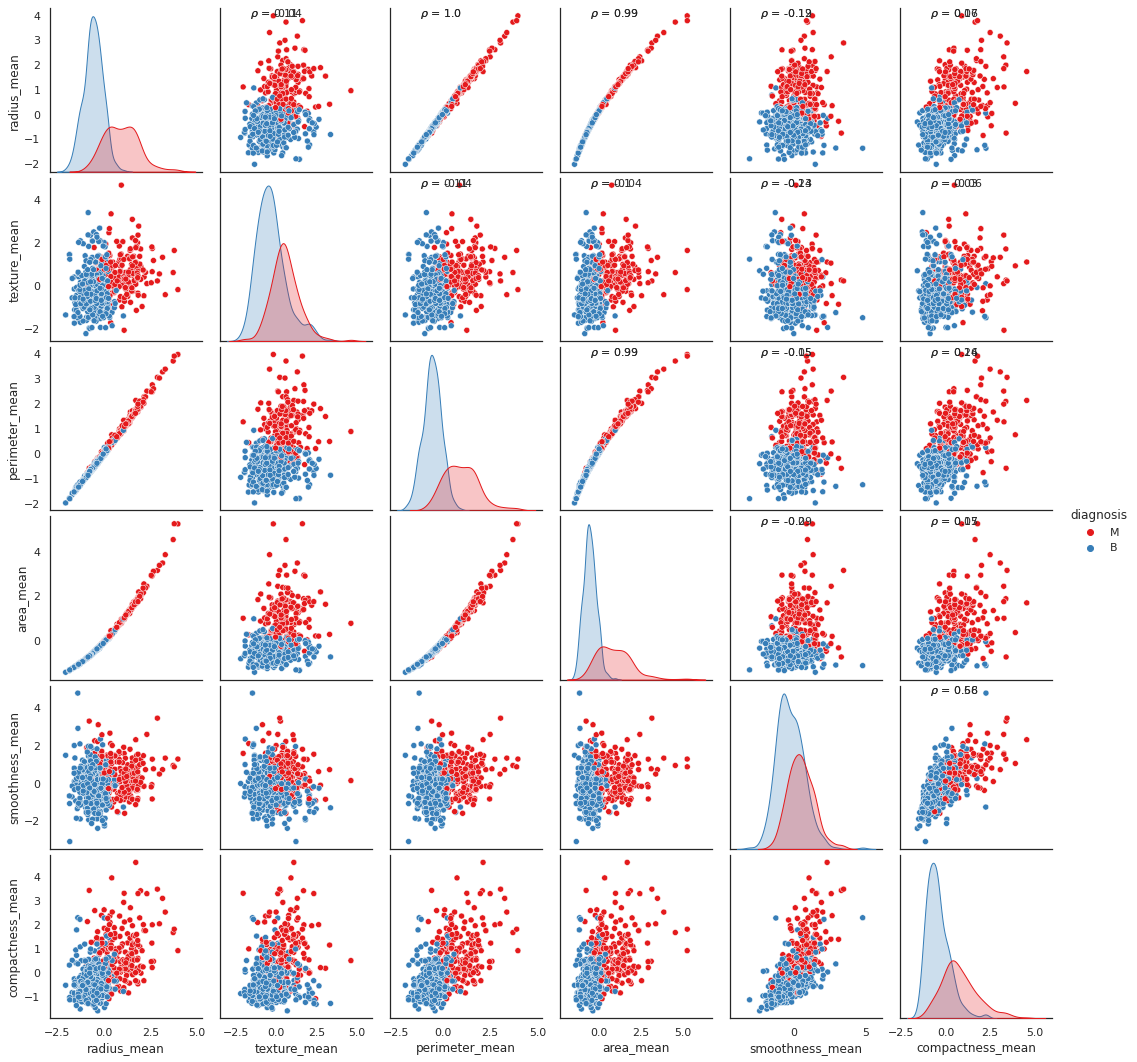

In [18]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 11, xycoords = ax.transAxes)
# First six features
data = pd.concat([y,data_n_2.iloc[:,0:6]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
grid = grid.map_upper(corr)

<b>Pairplot for next six features (7-12).</b>

<Figure size 720x720 with 0 Axes>

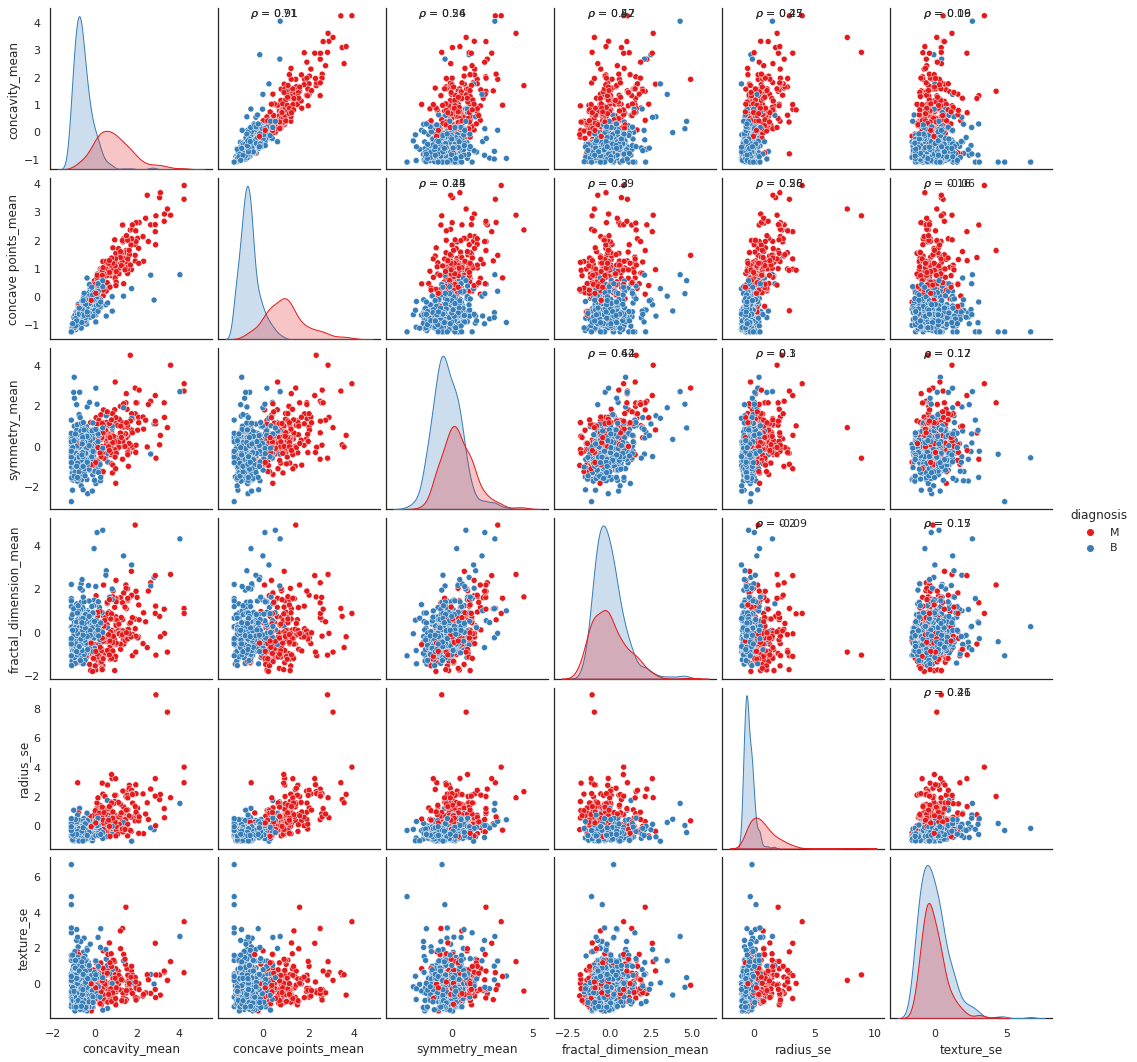

In [19]:
data = pd.concat([y,data_n_2.iloc[:,6:12]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
grid = grid.map_upper(corr)


<b>Pairplot for next six features (12-18).</b>

<Figure size 720x720 with 0 Axes>

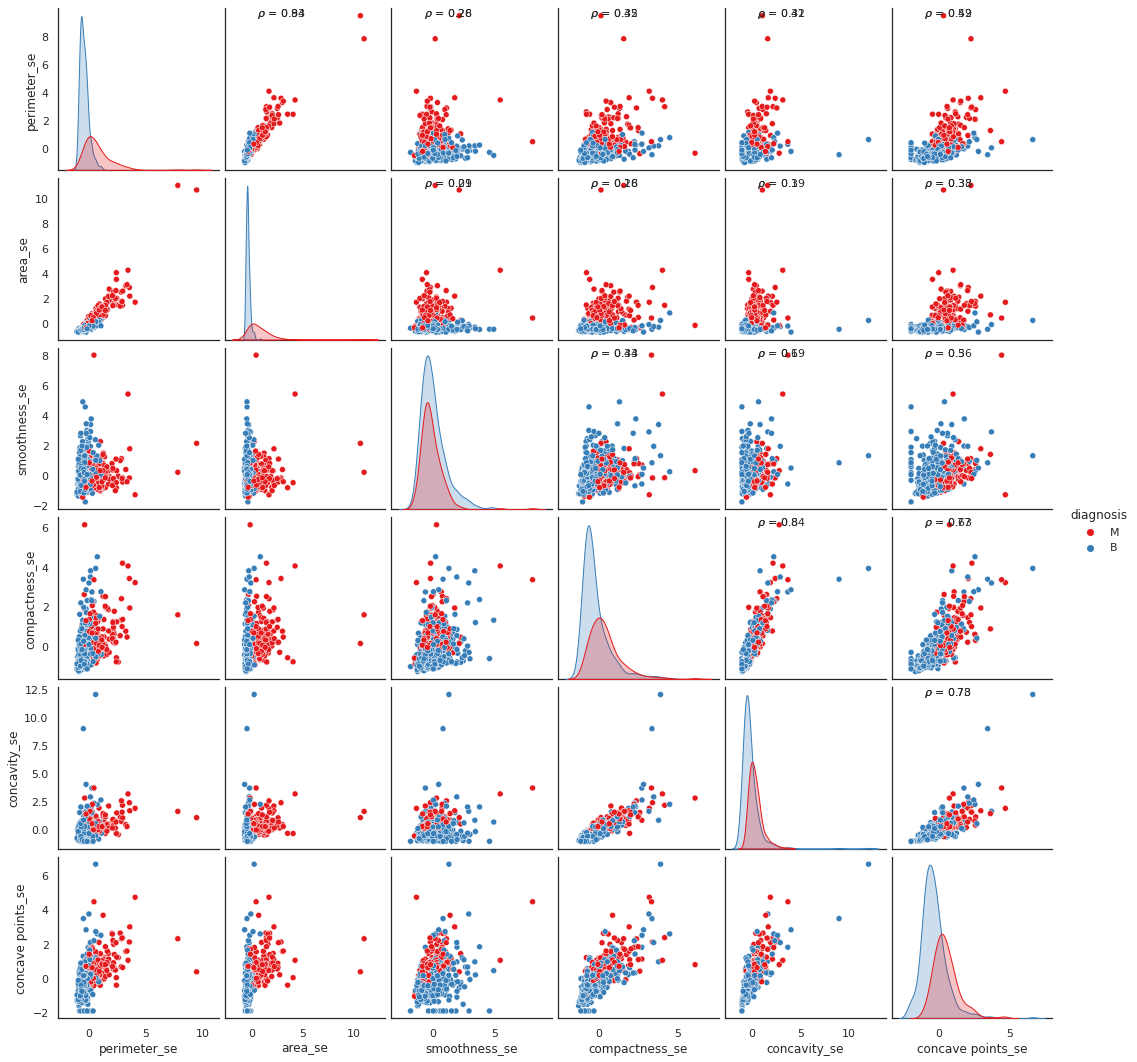

In [20]:
data = pd.concat([y,data_n_2.iloc[:,12:18]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
grid = grid.map_upper(corr)

<b>Pairplot for next six features (18-24).</b>

<Figure size 720x720 with 0 Axes>

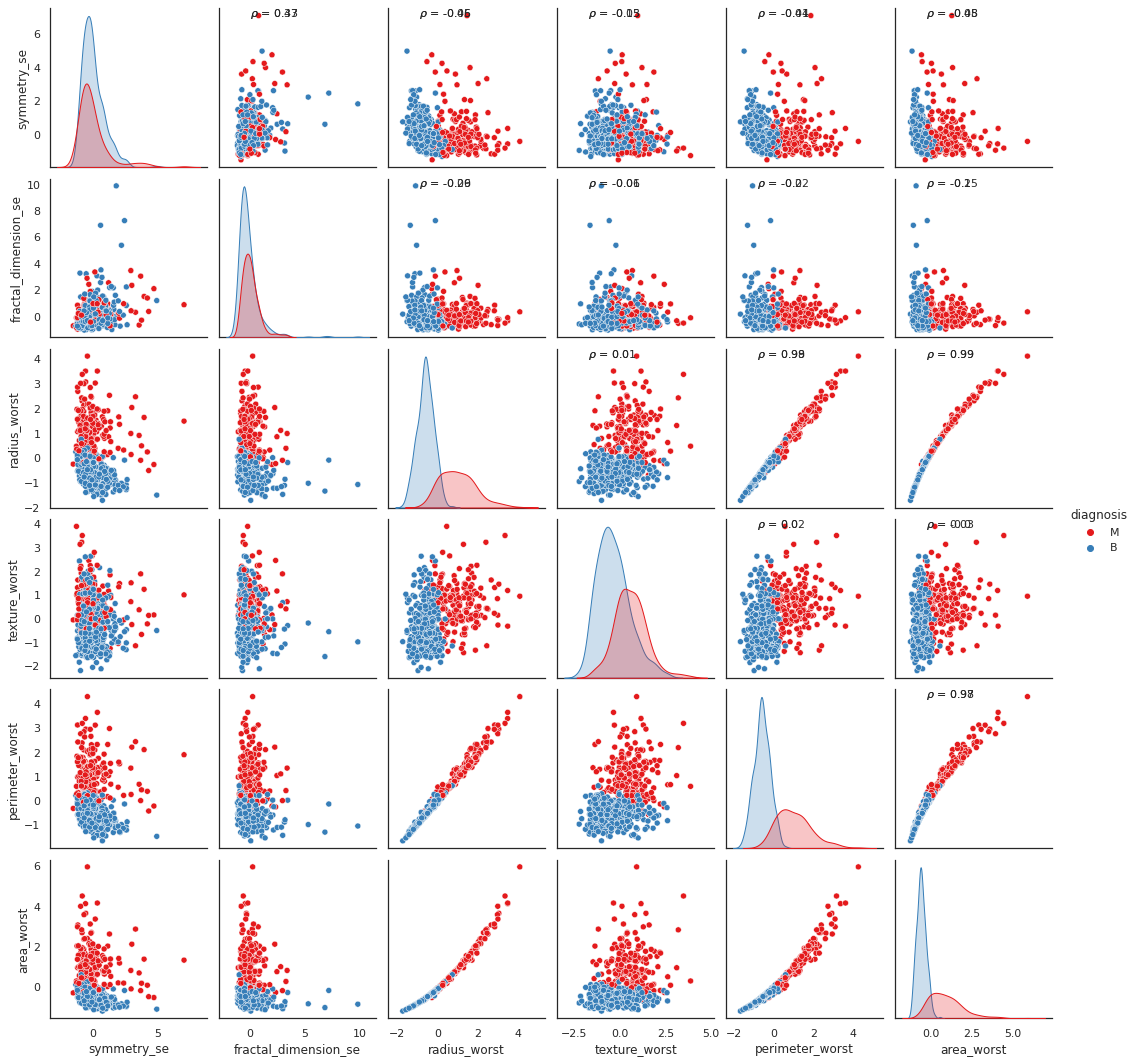

In [21]:
# Next six features
data = pd.concat([y,data_n_2.iloc[:,18:24]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
grid = grid.map_upper(corr)

<b>Pairplot for next six features (24-30).</b>

<Figure size 720x720 with 0 Axes>

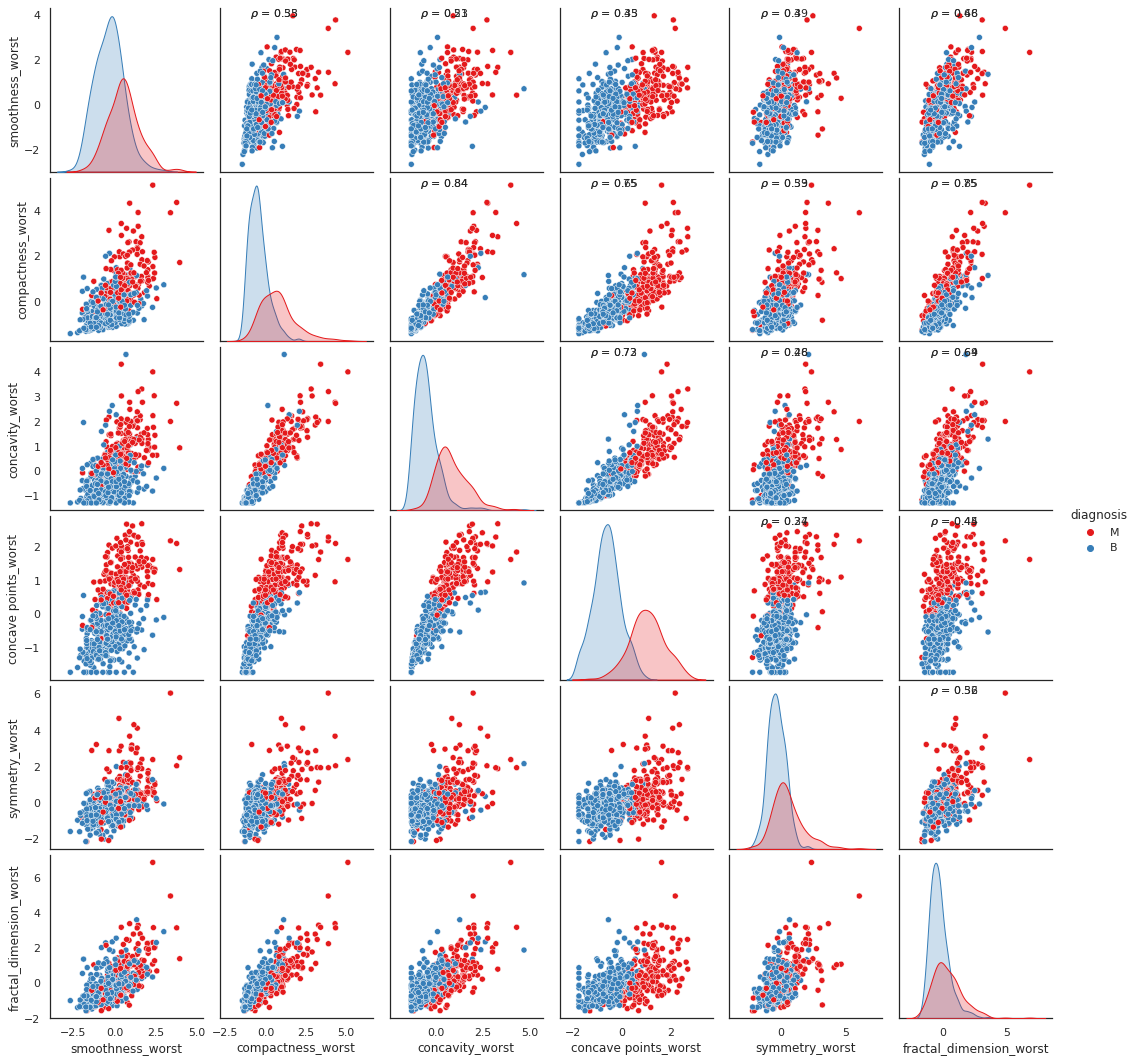

In [22]:
# Next six features
data = pd.concat([y,data_n_2.iloc[:,24:30]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
grid = grid.map_upper(corr)

#### 1.3.4.3 Check heatmap of continuous features<a class="anchor" id="heatmap"></a>
[Back to Table of Contents](#bcImp)

A heatmap (or heat map) is a graphical representation of data where values are depicted by color. Here we will generate the heatmap of correlation matrix of continuous features. 

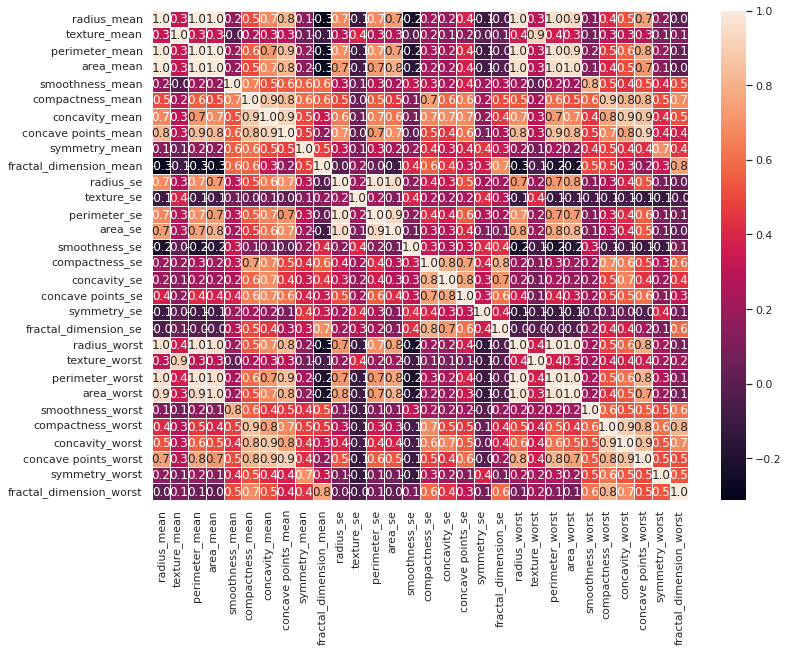

In [23]:
#correlation matrix
corrmat = X.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

As it can be seen in heat map plot <b>radius_mean, perimeter_mean and area_mean</b> are highly correlated with each other so we can use one of them. If you ask how we choose one as a feature to use, well actually there is no correct answer. 

Compactness_mean, concavity_mean and concave points_mean are correlated with each other. Therefore we can choose one of them. Apart from these, radius_se, perimeter_se and area_se are correlated and we can use one of them. radius_worst, perimeter_worst and area_worst are correlated so we can use one of them. Compactness_worst, concavity_worst and concave points_worst so we can use one of them. Compactness_se, concavity_se and concave points_se so we can use one them. texture_mean and texture_worst are correlated and we can use one of them. area_worst and area_mean are correlated, we can use one of them.

<b>Lets drop correlated variables and check again heat map.</b>

In [24]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = X.drop(drop_list1,axis = 1 ) 

<AxesSubplot:>

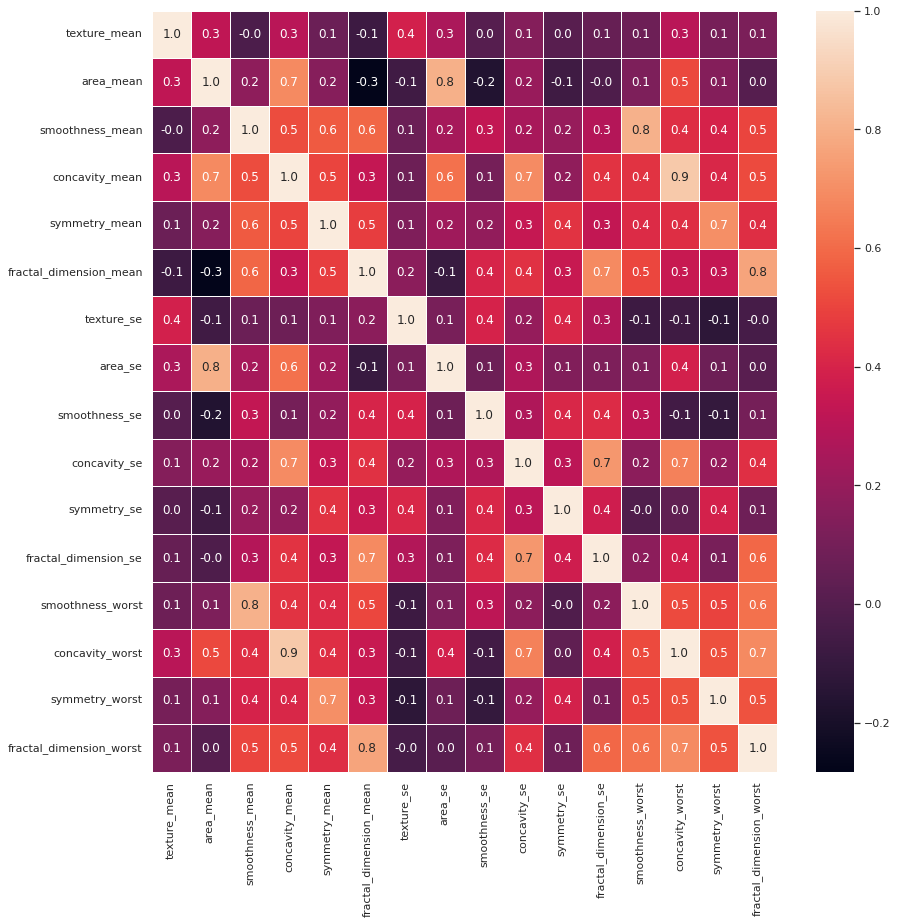

In [25]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

After drop correlated features, as it can be seen in above correlation matrix, there is only one high correlation value 0.9 between concavity_mean and concavity_worst. We will check model performance based on these features in Part 2.

##  In summary <a class="anchor" id = "relationshipSummary"></a>
[Back to Table of Contents](#bcImp)

We can conclude that:
* Joint plot, pair plot, and heatmap can be used to see the correlation between variables.
* There are <b>high correlation variables in the dataset.

Well, <b>Part 1</b> ends here. In this article, we did a pretty good analysis of Breast Cancer Wisconsin Dataset. We understood how to explore data and note the key things before data preparation.

In <b>part 2</b>, we are going to focus on <b>Feature Selection, Modeling and Evaluation</b>.

I hope you guys have enjoyed reading it. Please share your thoughts/doubts in the comment section.

If this helped in your learning, then please like 👍 and UPVOTE Kaggle notebook as they are the source of motivation 😔👈🏋🥇, and be sure to check out the other parts which will be soon available:

* <b>Part 2 | Feature Selection, Modeling and Evaluation</b>
* <b>Part 3 | Model building and comparision (Logistic Regression, Random Forest Classifier, Gradient Boosting Classifier, Extra Trees Classifier, XGB Classifier, KNeighbors Classifier and SVM Classifier)</b>
* <b>Part 4 | Model Deployment Using Flask APIs and Heroku<b>

### References
* W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.
* O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and prognosis via linear programming. Operations Research, 43(4), pages 570-577, July-August 1995.
* W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 163-171.
* W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Image analysis and machine learning applied to breast cancer diagnosis and prognosis. Analytical and Quantitative Cytology and Histology, Vol. 17 No. 2, pages 77-87, April 1995.